In [4]:
import spotipy


In [5]:
from spotipy.oauth2 import SpotifyOAuth

In [6]:
scope = "user-read-recently-played"

In [15]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope="user-read-recently-played",
                                               client_id="7e08d8d4d58849c699fd45e43e4a72ad",
                                              client_secret="1f16fcf298674590922e8be9ba1a5093",
                                              redirect_uri="http://localhost:9000"))


In [16]:
results = sp.current_user_recently_played()

In [17]:
type(results)

dict

In [18]:
results.keys()

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

In [22]:
for idx, item in enumerate(results['items']):
    track_id = item['track']
    track_name = track_id['name']

    artist_name = track_id['artists'][0]['name']
    
    print(f"{idx}.) {track_name} by {artist_name}")

0.) Cello Concerto in E Minor, RV 409: II. Allegro by Antonio Vivaldi
1.) Main Theme from Goncharov by Jordan Dean
2.) Sustum by Can Bonomo
3.) Rude Buster by Toby Fox
4.) My Castle Town by Toby Fox
5.) Tsialo Liato by La Fanforale du Douzbekistan
6.) Nedo Mila Kerko by La Fanforale du Douzbekistan
7.) Majko - Gusta Mi Magla by La Fanforale du Douzbekistan
8.) Stepil Dobri by La Fanforale du Douzbekistan
9.) Ako Umram by La Fanforale du Douzbekistan
10.) Patience Is A Virtue by Clem Leek
11.) Lone Sojourner by Yu-Peng Chen
12.) Makana by Hello Psychaleppo
13.) FIRAQ - Live Album by Shkoon
14.) Oh! You Pretty Things - 2015 Remaster by David Bowie
15.) Caelestinum Finale Termini by Yu-Peng Chen
16.) A Storm, A Spire, and A Sanctum (Dvalin's Nest) by Yu-Peng Chen
17.) A Sweet Smile by Yu-Peng Chen
18.) Dawn Winery Theme by Yu-Peng Chen
19.) Genshin Impact Main Theme by Yu-Peng Chen
20.) Unholy (feat. Kim Petras) by Sam Smith
21.) Hayret by Adamlar
22.) Candles by Jon Hopkins
23.) Waiting 

In [23]:
kendrick_lamar = sp.artist("2YZyLoL8N0Wb9xBt1NhZWg")

In [24]:
kendrick_lamar

{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
 'followers': {'href': None, 'total': 22729614},
 'genres': ['conscious hip hop', 'hip hop', 'rap', 'west coast rap'],
 'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
 'id': '2YZyLoL8N0Wb9xBt1NhZWg',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb437b9e2a82505b3d93ff1022',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174437b9e2a82505b3d93ff1022',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178437b9e2a82505b3d93ff1022',
   'width': 160}],
 'name': 'Kendrick Lamar',
 'popularity': 90,
 'type': 'artist',
 'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}

In [27]:
kendrick_albums = sp.artist_albums(kendrick_lamar["id"], limit = 50)


In [29]:
for album in kendrick_albums["items"]:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Album: Mr. Morale & The Big Steppers -- ID: 79ONNoS4M9tfIA1mYLBYVX
Album: Mr. Morale & The Big Steppers -- ID: 3OqPkYVDzHKistrI9exrjR
Album: Black Panther The Album Music From And Inspired By -- ID: 3pLdWdkj83EYfDN6H2N8MR
Album: Black Panther The Album Music From And Inspired By -- ID: 5sOSzueqgCiVpXNcpd6QpL
Album: DAMN. COLLECTORS EDITION. -- ID: 4alcGHjstaALJHHiljfy3H
Album: DAMN. COLLECTORS EDITION. -- ID: 1LLOGSa5ehwSWrPg1Qc3Vg
Album: DAMN. -- ID: 4eLPsYPBmXABThSJ821sqY
Album: DAMN. -- ID: 0bLXUfNT34mna9aXq8ex68
Album: untitled unmastered. -- ID: 0kL3TYRsSXnu0iJvFO3rud
Album: untitled unmastered. -- ID: 2BV6bwYo6UZXHlrzQtPjXC
Album: To Pimp A Butterfly -- ID: 7ycBtnsMtyVbbwTfJwRjSP
Album: To Pimp A Butterfly -- ID: 6w7lqIsvDPgTChMrPw5oIL
Album: good kid, m.A.A.d city (Deluxe) -- ID: 748dZDqSZy6aPXKcI9H80u
Album: good kid, m.A.A.d city -- ID: 0Oq3mWfexhsjUh0aNNBB5u
Album: good kid, m.A.A.d city -- ID: 0E47vczx9XVds1Lr2Y8rze
Album: Section.80 -- ID: 1bkN9nIkkCnXeG4yitVS1J
Album: Over

In [31]:
album_names = []
albums = []

for album in kendrick_albums['items']:
    album_name = album['name']
    album_id = album['id']
   
    if album_name[:3] not in album_names and "remix" not in album_name and "Karaoke" not in album_name and "Live" not in album_name:
        album_names.append(album_name[:3] )
        albums.append((album_name,album_id))

In [32]:
albums

[('Mr. Morale & The Big Steppers', '79ONNoS4M9tfIA1mYLBYVX'),
 ('Black Panther The Album Music From And Inspired By',
  '3pLdWdkj83EYfDN6H2N8MR'),
 ('DAMN. COLLECTORS EDITION.', '4alcGHjstaALJHHiljfy3H'),
 ('untitled unmastered.', '0kL3TYRsSXnu0iJvFO3rud'),
 ('To Pimp A Butterfly', '7ycBtnsMtyVbbwTfJwRjSP'),
 ('good kid, m.A.A.d city (Deluxe)', '748dZDqSZy6aPXKcI9H80u'),
 ('Section.80', '1bkN9nIkkCnXeG4yitVS1J'),
 ('Overly Dedicated', '7MoLQ8vckhwBbQqEYQTYQC'),
 ('The Heart Part 5', '5XClh485CRBIIKaNXWWt7Z'),
 ('family ties (with Kendrick Lamar)', '3HqmX8hGcbbQZODgayNEYx'),
 ("King's Dead (with Kendrick Lamar, Future & James Blake)",
  '1NXM5lF9YB7a3f1e4R48oH'),
 ('All The Stars (with SZA)', '3mau89iBea8nCPw3I8kKAk'),
 ('HUMBLE. (SKRILLEX REMIX)', '1X4aaOIXvs6gWtQZQpln4V'),
 ('Alright', '3IpApJonZkbcvtrQOg7wB0'),
 ('County Building Blues', '6BJpSV1fWWxOl8K4bLufef'),
 ('Swimming Pools (Drank) [Black Hippy Remix]', '6gyBOHTEtKHEPIy9EAWjdB'),
 ('i', '38sMZ2Aohv96xfkFUT5cQR'),
 ("Bitch, Do

In [33]:
final_album_list = albums[:-14]

In [34]:
final_album_list

[('Mr. Morale & The Big Steppers', '79ONNoS4M9tfIA1mYLBYVX'),
 ('Black Panther The Album Music From And Inspired By',
  '3pLdWdkj83EYfDN6H2N8MR'),
 ('DAMN. COLLECTORS EDITION.', '4alcGHjstaALJHHiljfy3H'),
 ('untitled unmastered.', '0kL3TYRsSXnu0iJvFO3rud'),
 ('To Pimp A Butterfly', '7ycBtnsMtyVbbwTfJwRjSP'),
 ('good kid, m.A.A.d city (Deluxe)', '748dZDqSZy6aPXKcI9H80u'),
 ('Section.80', '1bkN9nIkkCnXeG4yitVS1J'),
 ('Overly Dedicated', '7MoLQ8vckhwBbQqEYQTYQC'),
 ('The Heart Part 5', '5XClh485CRBIIKaNXWWt7Z'),
 ('family ties (with Kendrick Lamar)', '3HqmX8hGcbbQZODgayNEYx')]

In [36]:
kendrick_song_ids = []

for album_name, album_id in final_album_list:
    tracks = sp.album_tracks(album_id)['items']
    
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        kendrick_song_ids.append((album_name,album_id,track_name,track_id))
        

In [39]:
kendrick_song_ids[2]

('Mr. Morale & The Big Steppers',
 '79ONNoS4M9tfIA1mYLBYVX',
 'Worldwide Steppers',
 '66mVPWmFvXPFf8pjK5ttOW')

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
features = sp.audio_features(tracks = ['66mVPWmFvXPFf8pjK5ttOW'])

In [43]:
features

[{'danceability': 0.514,
  'energy': 0.472,
  'key': 8,
  'loudness': -11.106,
  'mode': 0,
  'speechiness': 0.368,
  'acousticness': 0.753,
  'instrumentalness': 0.00012,
  'liveness': 0.0746,
  'valence': 0.557,
  'tempo': 77.215,
  'type': 'audio_features',
  'id': '66mVPWmFvXPFf8pjK5ttOW',
  'uri': 'spotify:track:66mVPWmFvXPFf8pjK5ttOW',
  'track_href': 'https://api.spotify.com/v1/tracks/66mVPWmFvXPFf8pjK5ttOW',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/66mVPWmFvXPFf8pjK5ttOW',
  'duration_ms': 203367,
  'time_signature': 3}]

In [44]:
pd.Series(features[0])

danceability                                                    0.514
energy                                                          0.472
key                                                                 8
loudness                                                      -11.106
mode                                                                0
speechiness                                                     0.368
acousticness                                                    0.753
instrumentalness                                              0.00012
liveness                                                       0.0746
valence                                                         0.557
tempo                                                          77.215
type                                                   audio_features
id                                             66mVPWmFvXPFf8pjK5ttOW
uri                              spotify:track:66mVPWmFvXPFf8pjK5ttOW
track_href          

In [45]:
df = pd.DataFrame()

In [50]:
for album_name,album_id,track_name, track_id in kendrick_song_ids:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)

In [51]:
df = df.transpose().set_index('id')
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]

,danceability,energy,key,acousticness,album_name,track_name
id,,,,,,
5Gt9bxniM1SxN61yRzRhXL,0.529,0.845,8,0.244,Mr. Morale & The Big Steppers,United In Grief
0fX4oNGBWO3dSGUZcVdVV2,0.79,0.67,1,0.377,Mr. Morale & The Big Steppers,N95
66mVPWmFvXPFf8pjK5ttOW,0.514,0.472,8,0.753,Mr. Morale & The Big Steppers,Worldwide Steppers
2g6tReTlM2Akp41g0HaeXN,0.775,0.736,1,0.319,Mr. Morale & The Big Steppers,Die Hard
28qA8y1sz0FTuSapsCxNOG,0.514,0.779,10,0.181,Mr. Morale & The Big Steppers,Father Time (feat. Sampha)


In [53]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [54]:
data_features = df.drop(['type', 'uri', 'track_href', 'analysis_url','album_name', 'album_id','track_name'], axis = 1)

In [55]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,117.000,117.000,117,117.000,117,117.000,117.0000
unique,103.000,102.000,12,116.000,2,108.000,111.0000
top,0.567,0.731,1,-8.128,1,0.297,0.0152
freq,3.000,4.000,32,2.000,62,3.000,3.0000


In [56]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)

In [57]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.625462,0.652462,4.897436,-7.698872,0.529915,0.273739,0.298761
std,0.129302,0.153608,3.623164,2.767310,0.501251,0.139661,0.252314
min,0.301000,0.128000,0.000000,-21.490000,0.000000,0.035800,0.000282
25%,0.535000,0.537000,1.000000,-8.766000,0.000000,0.186000,0.078600
50%,0.618000,0.677000,5.000000,-7.176000,1.000000,0.282000,0.244000
75%,0.713000,0.782000,8.000000,-5.800000,1.000000,0.368000,0.455000
max,0.959000,0.907000,11.000000,-3.343000,1.000000,0.750000,0.924000


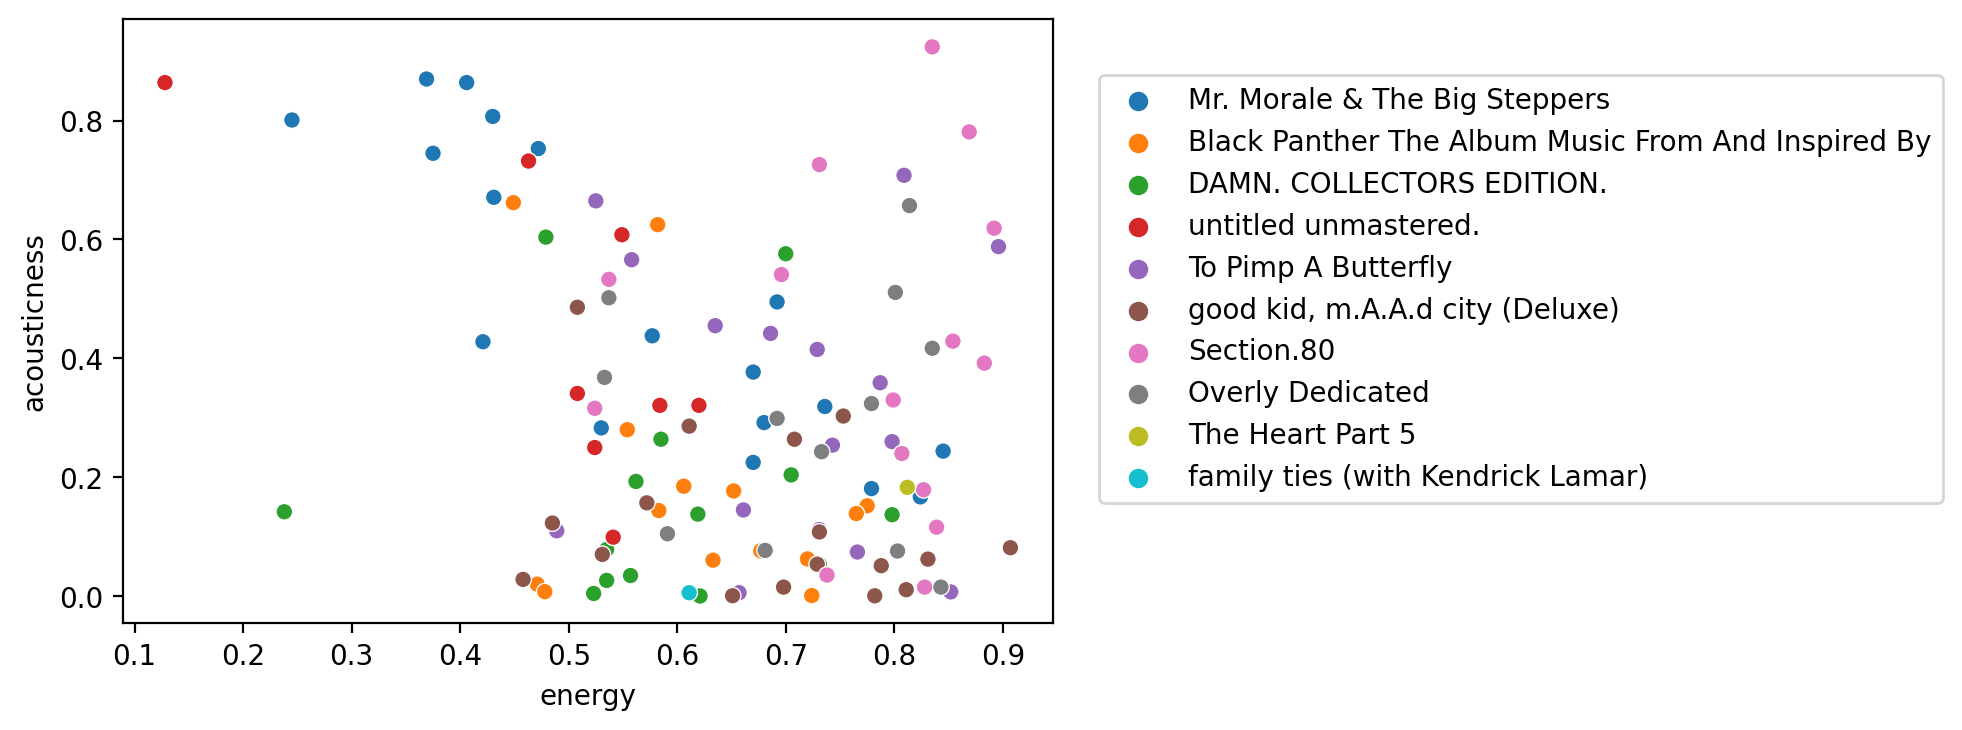

In [67]:

plt.figure(dpi = 200)
sns.scatterplot(x = 'energy', y = 'acousticness', data = data_features, hue = df['album_name'])
plt.legend(loc = (1.05,0.2))

In [68]:
import scipy

In [70]:
distances = scipy.spatial.distance.cdist(data_features, data_features, metric = "euclidean")

In [71]:
distances.shape

(117, 117)

<AxesSubplot:>

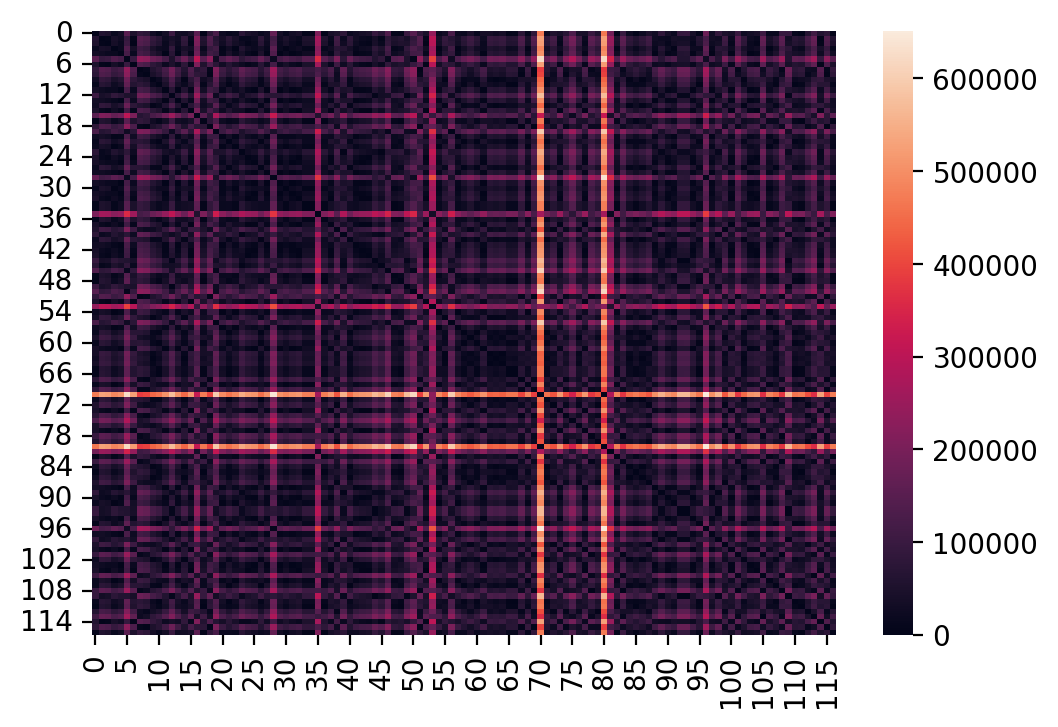

In [72]:
plt.figure(dpi=200)
sns.heatmap(distances)